# Quickstart


`AutoEmulate`'s goal is to make it easy to find a good emulator model for your simulation. Here's the basic workflow:

In [1]:
import numpy as np
from autoemulate.compare import AutoEmulate
from autoemulate.experimental_design import LatinHypercube
from autoemulate.simulations.projectile import simulator

## Experimental design

Before we build an emulator or surrogate model, we need to get a set of input/output pairs from the simulation. This is called the **experimental design** and is currently not a key part of `AutoEmulate`, because this step is tricky to automate. We usually sample using a Latin Hypercube to cover the input space well.   

Below, `simulator` is a simulation for a projectil motion with drag (see [here](https://mogp-emulator.readthedocs.io/en/latest/intro/tutorial.html) for details). It takes two inputs, the drag coefficient (on a log scale) and the velocity and outputs the distance the projectile travelled. We sample 100 sets of inputs `X` using a Latin Hypercube and run the simulator for those inputs to get the outputs `y`.

In [2]:
# sample from a simulation
lhd = LatinHypercube([(-5., 1.), (0., 1000.)])
X = lhd.sample(100)
y = np.array([simulator(x) for x in X])
X.shape, y.shape

((100, 2), (100,))

## Compare emulator models using `AutoEmulate`

With a set of inputs / outputs, we can run `AutoEmulate` in just three lines of code. First, we initialise an `AutoEmulate` object. Then, we run `setup(X, y)`, providing the simulation inputs and outputs. Lastly, `compare()` will fit a range of different models to the data and evaluate them using cross-validation. 

In [3]:
# compare emulator models
ae = AutoEmulate()
ae.setup(X, y)
ae.compare()

autoemulate - Cross-validating SecondOrderPolynomial...
autoemulate - Parameters: {'degree': 2}
autoemulate - Cross-validating RBF...
autoemulate - Parameters: {'degree': 1, 'epsilon': 1.0, 'kernel': 'thin_plate_spline', 'smoothing': 0.0}
autoemulate - Cross-validating RandomForest...
autoemulate - Parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False, 'random_state': None}
autoemulate - Cross-validating GradientBoosting...
autoemulate - Parameters: {'ccp_alpha': 0.0, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0}
autoemulate - Cross-validating GaussianProcessSk...
autoemulate - Parameters: {'alpha': 1e-10, 'copy_X_train': True, 'kernel__length_scale': 1.0, 'kerne

## Printing and plotting

We can print the results in tabular form:

In [4]:
ae.print_results()

Average scores across all models:
                   model        r2         rmse
0                    RBF  0.985080   900.040847
1      GaussianProcessSk  0.920328  1189.647021
2           RandomForest  0.826618  2861.643615
3       GradientBoosting  0.825013  2872.738002
4  SupportVectorMachines  0.821414  3361.309983
5  SecondOrderPolynomial  0.766679  3581.052731
6                XGBoost  0.494062  4423.480062
7            NeuralNetSk -0.158845  7711.243750
8         NeuralNetTorch -0.214636  8268.446582


Or create plots for the cv-folds with the best metrics:

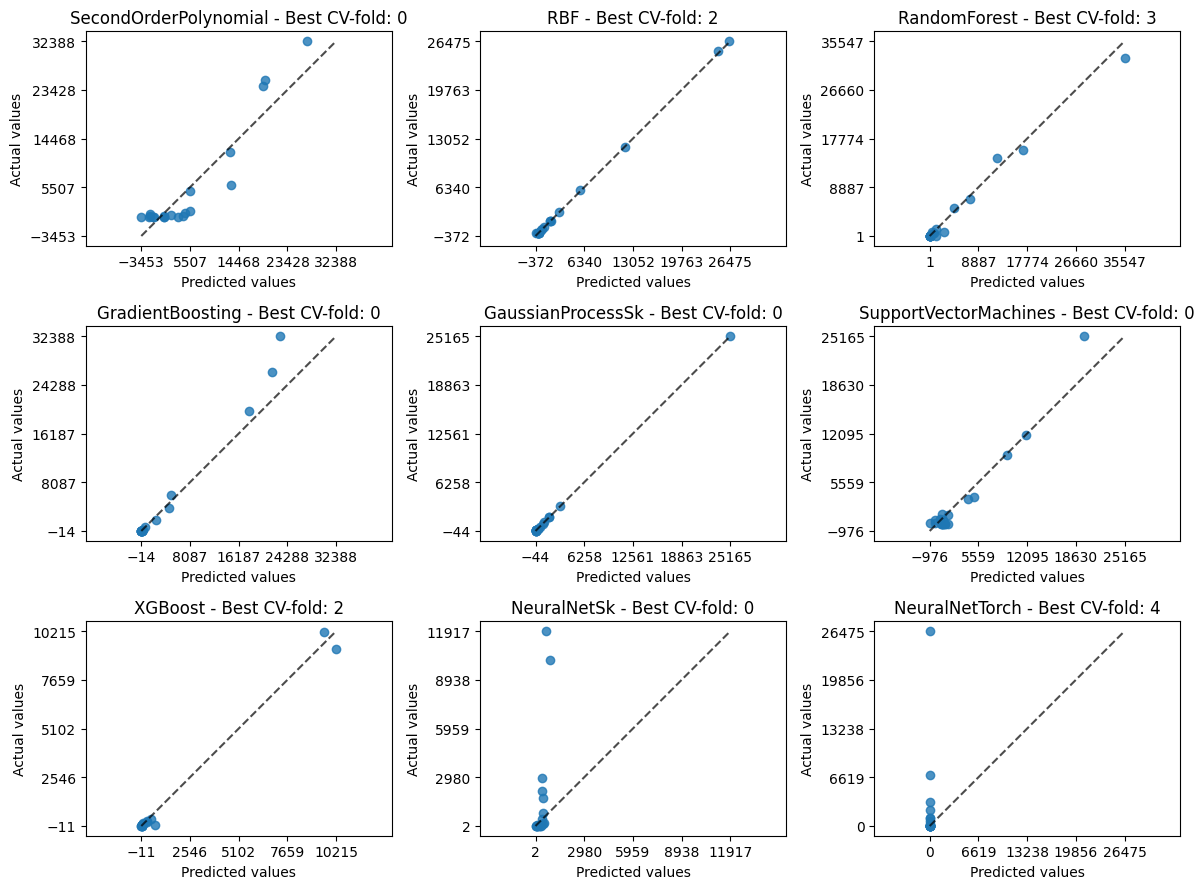

In [5]:
ae.plot_results()

## Saving models

Lastly, we can save and load the best model. Note: there are some checks that the environment in which the model is loaded is similar to the environment in which it was saved.

In [6]:
# save & load best model
ae.save_model("best_model")
best_emulator = ae.load_model("best_model")

In [7]:
# emulate
best_emulator.predict(X[:10])

array([ 4.80967007e+03, -4.00916972e+01,  3.26283620e+03,  8.81600040e+02,
        1.11856831e+00,  2.64476351e+02,  5.27903629e+00,  7.38697528e+02,
        1.75074950e+02,  5.45564989e+02])